In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [55]:
df = pd.read_csv("../data/BostonHousing.csv")

In [56]:
df.drop(columns=["b"], inplace=True, axis=1)

In [57]:
X = df.drop(columns=["medv"], axis=1)
y = df["medv"]

## Train model

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [60]:
y_pred = rf.predict(X_test)

print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Test RMSE:  2.799778996880388


In [61]:
y_pred = rf.predict(X_train)

print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred)))

Train RMSE:  1.4041607514247023


As we can see a RF is overfitting the boston data. This [article](https://mljar.com/blog/random-forest-overfitting/) has a nice example of RF overfitting data

## Fine tunning the RF model

Now we experiment with increasing the number of trees

In [65]:
train_rmse = []
test_rmse = []
n_estimators_list = []

for i in range(1, 500, 20):
    rf = RandomForestRegressor(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)
    
    y_pred_test = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)
    
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    n_estimators_list.append(i)

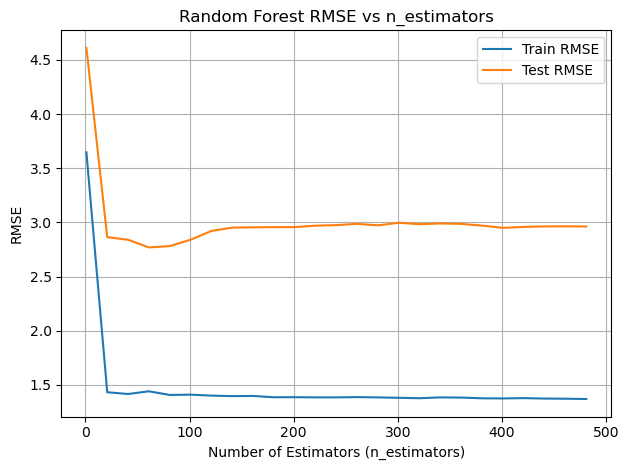

In [68]:
#plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_rmse, label='Train RMSE')
plt.plot(n_estimators_list, test_rmse, label='Test RMSE')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('RMSE')
plt.title('Random Forest RMSE vs n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()


The model is clearly overfitting the data again!